In [1]:
##Importando os pacotes e módulos necessários
import pandas as pd
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Pacotes para fazer a coleta dos dados armazenados no mesmo diretório
import os
import pathlib
import glob

#Para Regressão Linear Simples
from scipy import stats

#Para Regressão Linear Múltipla
import statsmodels.api as sm

##Criando as Funções
def coletar_dados(nome = ""):
    '''
    Função que le os arquivos do Stata
    O arquivo deve estar na mesma pasta do arquivo de Python
    Deixe em branco para ler o arquivo mais recentemente adicionado
    '''
    global df
    #Pegando qual a pasta do arquivo que está sendo usado pra programar
    caminho = pathlib.Path().absolute()

    #checando se o nome foi inserido ou não; caso não, pegar o arquivo .dta mais recente
    if nome == "":
        arquivo = max(glob.glob(f"{str(caminho)}/*.dta"), key=os.path.getctime)
        df = pd.read_stata(arquivo)
        print(f"{arquivo}.dta foi lido com sucesso!")
        return df
    else:
        try:
            arquivo = f"{str(caminho)}/{str(nome)}.dta"
            df = pd.read_stata(arquivo)
            print(f"{nome}.dta foi lido com sucesso!")
            return df
        except: #caso não tenha sido encontrado o arquivo com o nome inserido
            print('''
            Não foi possível achar o arquivo :(\n
            Verifique se seu nome está correto (sem a extensão) e se ele está no mesmo diretório do programa!
            ''')

def Regressão_Simples(Lista_x, Lista_y):
    '''
    Função que calcula as estatísticas de uma regressão simples
    '''
    global Lista_ychapeu_simples, Resíduos_simples
    
    #calculando o número de observações e as médias
    Número_de_Observações = len(Lista_x)
    Média_x = sum(Lista_x)/Número_de_Observações
    Média_y = sum(Lista_y)/Número_de_Observações

    #Calculando os coeficientes do modelo
    B1, B0, R, valor_P, DP = stats.linregress(Lista_x, Lista_y)
    #Gerando os valores previstos
    Lista_ychapeu_simples = [round(B0 + B1 * i,3) for i in Lista_x]
    #Calculando os Resíduos
    Resíduos_simples = [(j - k) for j,k in zip(Lista_y, Lista_ychapeu_simples)]
    
    #Calculando R-quadrados e a Soma dos Quadrados das Variáveis
    R_quadrado = round(R**2,5)
    SQTx = sum([(i - Média_x)**2 for i in Lista_x])
    SQTy = sum([(i - Média_y)**2 for i in Lista_y])
    SQEy = sum([(i - Média_y)**2 for i in Lista_ychapeu_simples])
    SQR = sum([i**2 for i in Resíduos_simples]) 

    #Calculando a Variância da Regressão e dos  Coeficientes
    VarianciaReg = SQR/(Número_de_Observações - 2)
    EPR = math.sqrt(VarianciaReg)
    VarB1 = VarianciaReg/SQTx
    VarB0 = (VarianciaReg * sum([i**2 for i in Lista_x]))/(Número_de_Observações * SQTx)
    
    #Calculando da estatistica t com intervalo de confiança de 95%  (p/ gerar os intervalos de confiança dos estimadores)
    Estatistica_t_Critica = stats.t.ppf(0.95, Número_de_Observações - 2)

    #Calculando os estimadores do limite inferior e superior
    B1_inferior = B1 - math.sqrt(VarB1) * Estatistica_t_Critica
    B1_superior = B1 + math.sqrt(VarB1) * Estatistica_t_Critica
    B0_inferior = B0 - math.sqrt(VarB0) * Estatistica_t_Critica
    B0_superior = B0 + math.sqrt(VarB0) * Estatistica_t_Critica
    
    #Gerando o Relatório
    Relatório = f'''
    Número de Observações = {Número_de_Observações}\n
    B0 = {round(B0,5)}\t B1 = {round(B1,5)}\t R-quadrado = {R_quadrado}\n
    Estimador da Variância = {round(VarianciaReg,5)}\t Erro Padrão da Regressão = {round(EPR,5)}\n
    Variância de B1 = {round(VarB1,5)}\t Variância de B0 = {round(VarB0,5)}\n
    Intervalo de Confiança de 95% para B1 (Inferior; B1; Superior): {round(B1_inferior,4)}; {round(B1,4)}; {round(B1_superior,4)}\n
    Intervalo de Confiança de 95% para B0 (Inferior; B0; Superior): {round(B0_inferior,4)}; {round(B0,4)}; {round(B0_superior,4)}\n
    Para ver os valores previstos, basta chamar a variável 'Lista_ychapeu_simples'\n
    Para ver os resíduos, chame a variável 'Resíduos_simples'
    '''
    print (Relatório)
    
    ##Criando um gráfico
    #Deixando o estilo bonitinho
    sns.set_style(style="white")

    #Criando o objeto gráfico
    Grafico = sns.regplot(x = Lista_x, y = Lista_y, scatter_kws={"color": "black"}, line_kws={"color": "red"})
    Grafico.set_title("Resultado da Regressão",fontsize = 11)
    plt.show()

def Regressão_Múltipla(x,y):
    global Resultado, Lista_ychapeu, Resíduos
    #adicionando uma constante ao modelo de Ordinary Least Squares(OLS)
    X = sm.add_constant(x)
    #Criando o Modelo
    Modelo = sm.OLS(y,X)
    Resultado = Modelo.fit()
    
    Lista_ychapeu = Resultado.predict()
    Resíduos = y - Lista_ychapeu

    #Calculando o Erro Padrão da Regressão (EPR)
    SQR =sum([i**2 for i in Resíduos])
    Número_de_Observações = len(y)
    GL = Número_de_Observações - len(Resultado.params)
    VarianciaReg = SQR/GL
    EPR = math.sqrt(SQR/GL)
    

    #Printando o Resultado
    #print('Parâmetros:\n', Resultado.params) #O primeiro resultado equivale ao intercepto
    #print('\nDesvios Padrões:\n', Resultado.bse)
    #print('Valores Previstos: ', Resultado.predict())
    #print('\nR2:', Resultado.rsquared)
    print(f"O erro padrão da regressão é {EPR}")
    print(Resultado.summary())

# Provando a parcialidade na RLM

In [2]:
df = coletar_dados('carros')

carros.dta foi lido com sucesso!



    Número de Observações = 81

    B0 = 18.35212	 B1 = -0.05112	 R-quadrado = 0.63155

    Estimador da Variância = 5.0364	 Erro Padrão da Regressão = 2.24419

    Variância de B1 = 2e-05	 Variância de B0 = 0.3285

    Intervalo de Confiança de 95% para B1 (Inferior; B1; Superior): -0.0584; -0.0511; -0.0438

    Intervalo de Confiança de 95% para B0 (Inferior; B0; Superior): 17.3982; 18.3521; 19.306

    Para ver os valores previstos, basta chamar a variável &#39;Lista_ychapeu_simples&#39;

    Para ver os resíduos, chame a variável &#39;Resíduos_simples&#39;
    


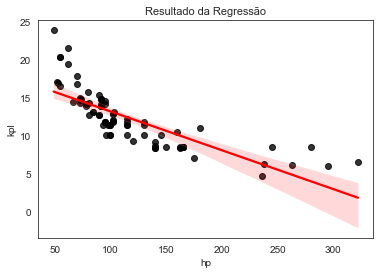

In [3]:
##Estimando a regressão simples kpl = Bo + B1hp + u:
Regressão_Simples(df['hp'],df['kpl'])


    Número de Observações = 81

    B0 = -322.33454	 B1 = 2.43015	 R-quadrado = 0.93469

    Estimador da Variância = 215.73564	 Erro Padrão da Regressão = 14.68794

    Variância de B1 = 0.00522	 Variância de B0 = 173.74547

    Intervalo de Confiança de 95% para B1 (Inferior; B1; Superior): 2.3099; 2.4302; 2.5504

    Intervalo de Confiança de 95% para B0 (Inferior; B0; Superior): -344.273; -322.3345; -300.396

    Para ver os valores previstos, basta chamar a variável &#39;Lista_ychapeu_simples&#39;

    Para ver os resíduos, chame a variável &#39;Resíduos_simples&#39;
    


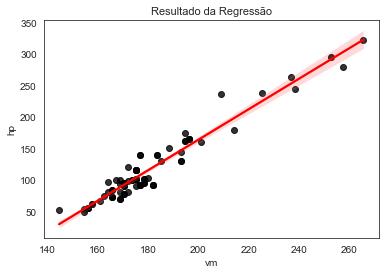

In [4]:
#No entanto, ao rodarmos regressões de hp sobre vm e pv, vemos que eles são correlacionados, o que viola a hipótese crucial:
Regressão_Simples(df['vm'],df['hp'])


    Número de Observações = 81

    B0 = -62.83004	 B1 = 0.12827	 R-quadrado = 0.69192

    Estimador da Variância = 1017.67932	 Erro Padrão da Regressão = 31.90109

    Variância de B1 = 9e-05	 Variância de B0 = 195.78571

    Intervalo de Confiança de 95% para B1 (Inferior; B1; Superior): 0.1122; 0.1283; 0.1443

    Intervalo de Confiança de 95% para B0 (Inferior; B0; Superior): -86.1185; -62.83; -39.5416

    Para ver os valores previstos, basta chamar a variável &#39;Lista_ychapeu_simples&#39;

    Para ver os resíduos, chame a variável &#39;Resíduos_simples&#39;
    


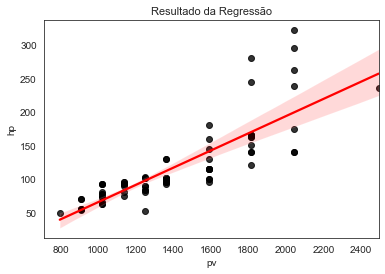

In [5]:
Regressão_Simples(df['pv'],df['hp'])

In [6]:
#Assim, temos que fazer uma regressão múltipla:
Regressão_Múltipla(df[['hp','vm','pv']],df['kpl'])

O erro padrão da regressão é 1.2753314807021852
                            OLS Regression Results                            
Dep. Variable:                    kpl   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     195.6
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           6.33e-36
Time:                        08:43:27   Log-Likelihood:                -132.58
No. Observations:                  81   AIC:                             273.2
Df Residuals:                      77   BIC:                             282.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [7]:
#Note que B1 de hp é igual a 0.144416; o mesmo pode ser obtido regredindo hp sobre vm e pv e coletando seus resíduos
Regressão_Múltipla(df[['vm','pv']],df['hp'])

O erro padrão da regressão é 5.205925914055133
                            OLS Regression Results                            
Dep. Variable:                     hp   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     4775.
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           2.71e-82
Time:                        08:43:27   Log-Likelihood:                -247.04
No. Observations:                  81   AIC:                             500.1
Df Residuals:                      78   BIC:                             507.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
co


    Número de Observações = 81

    B0 = 12.34691	 B1 = 0.14416	 R-quadrado = 0.04068

    Estimador da Variância = 13.11322	 Erro Padrão da Regressão = 3.62122

    Variância de B1 = 0.0062	 Variância de B0 = 0.16189

    Intervalo de Confiança de 95% para B1 (Inferior; B1; Superior): 0.0131; 0.1442; 0.2752

    Intervalo de Confiança de 95% para B0 (Inferior; B0; Superior): 11.6772; 12.3469; 13.0166

    Para ver os valores previstos, basta chamar a variável &#39;Lista_ychapeu_simples&#39;

    Para ver os resíduos, chame a variável &#39;Resíduos_simples&#39;
    


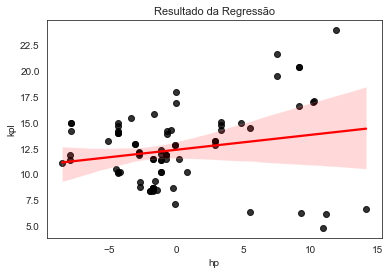

In [8]:
Regressão_Simples(Resíduos,df['kpl'])
#Note que B1 tem o mesmo valor! Além disso, pv parecia, na regressão simples, negativamente correlacionado com kpl, o que ocorria porque não estávamos controlando para outras variáveis

# Mostrando a relação entre os estimadores da Regressão Simples e a Regressão Múltipla


    Número de Observações = 81

    B0 = 18.35212	 B1 = -0.05112	 R-quadrado = 0.63155

    Estimador da Variância = 5.0364	 Erro Padrão da Regressão = 2.24419

    Variância de B1 = 2e-05	 Variância de B0 = 0.3285

    Intervalo de Confiança de 95% para B1 (Inferior; B1; Superior): -0.0584; -0.0511; -0.0438

    Intervalo de Confiança de 95% para B0 (Inferior; B0; Superior): 17.3982; 18.3521; 19.306

    Para ver os valores previstos, basta chamar a variável &#39;Lista_ychapeu_simples&#39;

    Para ver os resíduos, chame a variável &#39;Resíduos_simples&#39;
    


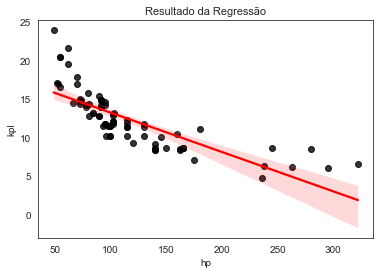

O erro padrão da regressão é 1.9595711879949882
                            OLS Regression Results                            
Dep. Variable:                    kpl   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     101.6
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           1.90e-22
Time:                        08:43:29   Log-Likelihood:                -167.90
No. Observations:                  81   AIC:                             341.8
Df Residuals:                      78   BIC:                             349.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [9]:
#Tomando o exemplo da RLM kpl = B0 + B1hp + B2vm
Regressão_Simples(df['hp'],df['kpl'])
Regressão_Múltipla(df[['hp','vm']],df['kpl'])


    Número de Observações = 81

    B0 = 135.79659	 B1 = 0.38462	 R-quadrado = 0.93469

    Estimador da Variância = 34.1441	 Erro Padrão da Regressão = 5.8433

    Variância de B1 = 0.00013	 Variância de B0 = 2.22702

    Intervalo de Confiança de 95% para B1 (Inferior; B1; Superior): 0.3656; 0.3846; 0.4037

    Intervalo de Confiança de 95% para B0 (Inferior; B0; Superior): 133.3128; 135.7966; 138.2804

    Para ver os valores previstos, basta chamar a variável &#39;Lista_ychapeu_simples&#39;

    Para ver os resíduos, chame a variável &#39;Resíduos_simples&#39;
    


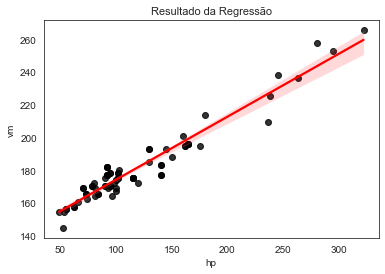

In [10]:
B1_simples = -0.05112
B1_multipla = -0.124568
B2_multipla = 0.190959

#Rodando a regressão Simples de vm sobre hp:
Regressão_Simples(df['hp'],df['vm'])

In [11]:
#Vemos que O1 = 0.38462
O1 = 0.38462

#Temos que garantir a validade da equação B1_simples = B1_multiplo + B2_multiplo x O1 = -0.05112
Validade = B1_multipla + B2_multipla*O1

if round(Validade,5) == B1_simples:
    print("Sucesso!")
else:
    print("Nope")

Sucesso!


### Fazendo para a regressão completa


In [12]:
Regressão_Múltipla(df[['hp','vm','pv']],df['kpl'])


O erro padrão da regressão é 1.2753314807021852
                            OLS Regression Results                            
Dep. Variable:                    kpl   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     195.6
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           6.33e-36
Time:                        08:43:29   Log-Likelihood:                -132.58
No. Observations:                  81   AIC:                             273.2
Df Residuals:                      77   BIC:                             282.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [13]:
B1_multipla = 0.144162
B2_multipla = -0.291651
B3_multipla = -0.015407

O1 = np.cov(df['hp'],df['vm'])[0][1]/np.var(df['hp'], ddof = 1) #[0][1] é usado porque essa função retorna uma matriz de covariância
O2 = np.cov(df['hp'],df['pv'])[0][1]/np.var(df['hp'], ddof = 1) #ddof é usado para fazer com que o estimador seja não viesado

#Temos que garantir a validade da equação B1_simples = B1_multiplo + B2_multiplo x O1 + B3_multiplo x 02 = -0.05112
Validade = B1_multipla + B2_multipla*O1 + B3_multipla*O2

print(Validade)
if np.around(Validade,5) == np.around(np.cov(df['hp'],df['kpl'])[0][1]/np.var(df['hp'], ddof = 1),5): 
    print("Sucesso!")
else:
    print("Nope")

-0.05112077926913909
Sucesso!


In [14]:
#Se omitirmos apenas uma variável (pv)
Regressão_Múltipla(df[['hp','vm']],df['kpl'])


O erro padrão da regressão é 1.9595711879949882
                            OLS Regression Results                            
Dep. Variable:                    kpl   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     101.6
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           1.90e-22
Time:                        08:43:30   Log-Likelihood:                -167.90
No. Observations:                  81   AIC:                             341.8
Df Residuals:                      78   BIC:                             349.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [15]:
B1_multipla1 = -0.124568
Regressão_Múltipla(df[['hp','vm']],df['pv'])

O erro padrão da regressão é 97.01767552858799
                            OLS Regression Results                            
Dep. Variable:                     pv   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     543.9
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           1.56e-46
Time:                        08:43:30   Log-Likelihood:                -483.97
No. Observations:                  81   AIC:                             973.9
Df Residuals:                      78   BIC:                             981.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [16]:
#Temos que ver se B1_multipla1 é igual a B3_multipla (coeficiente real da variável omitida)*coeficiente de hp na regressão de pv sobre as demais variáveis
print(B1_multipla + B3_multipla*17.442004)

-0.12456695562800002


## Exercício 5 Lista 2

In [17]:
df = pd.read_excel('dados_carros.xlsx')

In [18]:
Regressão_Múltipla(df[['VM','HP','PV']],df['KPL'])

O erro padrão da regressão é 1.275331826707967
                            OLS Regression Results                            
Dep. Variable:                    KPL   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     195.6
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           6.33e-36
Time:                        08:43:30   Log-Likelihood:                -132.58
No. Observations:                  81   AIC:                             273.2
Df Residuals:                      77   BIC:                             282.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [19]:
print(Resultado.summary())
df.describe()

                            OLS Regression Results                            
Dep. Variable:                    KPL   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     195.6
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           6.33e-36
Time:                        08:43:30   Log-Likelihood:                -132.58
No. Observations:                  81   AIC:                             273.2
Df Residuals:                      77   BIC:                             282.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.8509      8.196      8.522      

,Observação,KPL,VM,HP,PV,VOL
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,41.000000,12.346914,180.977778,117.469136,1405.600000,3.485185
std,23.526581,3.673999,22.721603,57.113502,370.368207,0.785352
min,1.000000,4.800000,144.800000,49.000000,793.800000,1.800000
25%,21.000000,10.100000,169.000000,84.000000,1134.000000,3.100000
50%,41.000000,11.900000,175.400000,100.000000,1360.800000,3.600000
75%,61.000000,14.300000,185.100000,140.000000,1587.600000,4.000000
max,81.000000,23.900000,265.500000,322.000000,2494.800000,5.600000


In [20]:
df.std()

Observação     23.526581
KPL             3.673999
VM             22.721603
HP             57.113502
PV            370.368207
VOL             0.785352
dtype: float64

In [21]:
#checando para multicolinearidade, pois o sinal do estimador de HP (potência) não faz tanto sentido
Regressão_Múltipla(df[['VM','PV']],df['HP'])

O erro padrão da regressão é 5.2059264613636085
                            OLS Regression Results                            
Dep. Variable:                     HP   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     4775.
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           2.71e-82
Time:                        08:43:30   Log-Likelihood:                -247.04
No. Observations:                  81   AIC:                             500.1
Df Residuals:                      78   BIC:                             507.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [22]:
#Fazendo a questão b
Regressão_Múltipla(df[['HP','PV']],df['VM'])

O erro padrão da regressão é 2.7403899095111264
                            OLS Regression Results                            
Dep. Variable:                     VM   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     2711.
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           8.29e-73
Time:                        08:43:30   Log-Likelihood:                -195.06
No. Observations:                  81   AIC:                             396.1
Df Residuals:                      78   BIC:                             403.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
c


    Número de Observações = 81

    B0 = 12.34691	 B1 = -0.29165	 R-quadrado = 0.04614

    Estimador da Variância = 13.03814	 Erro Padrão da Regressão = 3.61084

    Variância de B1 = 0.02226	 Variância de B0 = 0.16096

    Intervalo de Confiança de 95% para B1 (Inferior; B1; Superior): -0.54; -0.2917; -0.0433

    Intervalo de Confiança de 95% para B0 (Inferior; B0; Superior): 11.6792; 12.3469; 13.0147

    Para ver os valores previstos, basta chamar a variável &#39;Lista_ychapeu_simples&#39;

    Para ver os resíduos, chame a variável &#39;Resíduos_simples&#39;
    


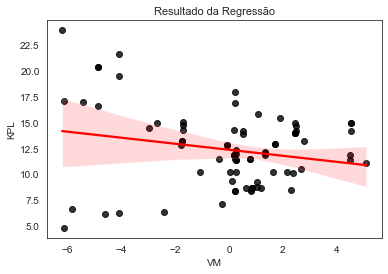

In [23]:
Regressão_Simples(Resíduos,df['KPL'])